## Importing Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

# import required libraries for clustering
import sklearn
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram

## Reading the Dataset

In [201]:
data = pd.read_csv('Group2_online1 retail.csv',encoding="latin-1")
data.head()

C:\Users\DELL\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,1/12/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,1/12/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,1/12/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,1/12/2010 8:26,3.39,17850.0,United Kingdom


In [3]:
data.shape

(532619, 8)

Inference: The dataset contains 8 Features and 532619 data points.

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


inference: The Invoice Date is Object type which should be converted to datetime.

In [5]:
data['InvoiceDate'].unique()

array(['01/12/2010 08:26', '01/12/2010 08:28', '01/12/2010 08:34', ...,
       '09/12/2011 12:31', '09/12/2011 12:49', '09/12/2011 12:50'],
      dtype=object)

In [6]:
#Converting the Invoice Date into datetime format

data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],dayfirst=True)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null datetime64[ns]
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.5+ MB


In [8]:
#Removing the time from the Invoice Date feature

data['InvoiceDate'] = [d.date() for d in data['InvoiceDate']]

In [9]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null object
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: float64(2), int64(1), object(5)
memory usage: 32.5+ MB


In [11]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'],dayfirst=True)

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532619 entries, 0 to 532618
Data columns (total 8 columns):
InvoiceNo      532619 non-null object
StockCode      532619 non-null object
Description    531165 non-null object
Quantity       532619 non-null int64
InvoiceDate    532619 non-null datetime64[ns]
UnitPrice      532619 non-null float64
CustomerID     397924 non-null float64
Country        532619 non-null object
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 32.5+ MB


In [13]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France


In [14]:
data.describe()

,Quantity,UnitPrice,CustomerID
count,532619.000000,532619.000000,397924.000000
mean,10.240010,3.847635,15294.315171
std,159.573967,41.758101,1713.169877
min,-9600.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


## Checking for Null Values

In [15]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     134695
Country             0
dtype: int64

In [16]:
# Calculating the Missing Values % contribution in the data frame

round(100*(data.isnull().sum())/len(data), 2)

InvoiceNo       0.00
StockCode       0.00
Description     0.27
Quantity        0.00
InvoiceDate     0.00
UnitPrice       0.00
CustomerID     25.29
Country         0.00
dtype: float64

1. The 'Description' feature consists of 0.27% of Null values which is very negligible, hence we can drop them.

2. The 'CustomerID' feature consists of 25% of Null values.

In [17]:
data.dropna(inplace=True) #Dropping Null values

In [18]:
data.isnull().sum()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

Null values have been removed.

In [19]:
data.shape

(397924, 8)

Inference: After the Null values are removed, the data points are reduced to 397924.

In [20]:
data['UnitPrice'][data['UnitPrice']==0].value_counts() #Checking for 0 Unit Price

0.0    40
Name: UnitPrice, dtype: int64

Inference: There are 40 data points with Unit Price 0 and hence can be dropped.

In [21]:
data.drop(data[data['UnitPrice']<=0].index,inplace=True)

In [22]:
data['UnitPrice'][data['UnitPrice']==0] #Checking for 0 Unit Price

Series([], Name: UnitPrice, dtype: float64)

Inference: The data points with 0 Unit Price are removed.

In [23]:
data['Quantity'][data['Quantity']<0] #Checking for -ve Quantity

Series([], Name: Quantity, dtype: int64)

Inference: There are no -ve quantity data points.

In [24]:
data.shape

(397884, 8)

In [25]:
data[data['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
45,536370,POST,POSTAGE,3,2010-12-01,18.0,12583.0,France
377,536403,POST,POSTAGE,1,2010-12-01,15.0,12791.0,Netherlands
1113,536527,POST,POSTAGE,1,2010-12-01,18.0,12662.0,Germany
5003,536840,POST,POSTAGE,1,2010-12-02,18.0,12738.0,Germany
5183,536852,POST,POSTAGE,1,2010-12-03,18.0,12686.0,France
...,...,...,...,...,...,...,...,...
531912,581493,POST,POSTAGE,1,2011-12-09,15.0,12423.0,Belgium
531930,581494,POST,POSTAGE,2,2011-12-09,18.0,12518.0,Germany
532440,581570,POST,POSTAGE,1,2011-12-09,18.0,12662.0,Germany
532477,581574,POST,POSTAGE,2,2011-12-09,18.0,12526.0,Germany


## Removing invalid Stock Codes

In [26]:
rmv = ['POST','M','DOT','B','S','AMAZONFEE','BANK CHARGES','gift_0001_10','gift_0001_20','gift_0001_30','gift_0001_40','gift_0001_50']
for i in rmv:
    data.drop(data[data['StockCode']==i].index, inplace=True)

In [27]:
data[data['StockCode']=='POST']

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country


In [28]:
data.shape

(396473, 8)

# Feature Engineering :

## Creating a Revenue feature

In [30]:
data['Revenue']= data['Quantity'] * data['UnitPrice']

In [31]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60


## Revenue generated from each Customer

In [32]:
revenue = data['Revenue'].groupby(data['CustomerID']).sum().reset_index()
revenue

,CustomerID,Revenue
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1437.24
3,12349.0,1457.55
4,12350.0,294.40
...,...,...
4329,18280.0,180.60
4330,18281.0,80.82
4331,18282.0,178.05
4332,18283.0,2088.93


In [33]:
revenue_data = revenue.sort_values(by=['Revenue'],ascending=False)
revenue_data.head(10)

,CustomerID,Revenue
1689,14646.0,279138.02
4197,18102.0,259657.30
3725,17450.0,194550.79
3006,16446.0,168472.50
1879,14911.0,140450.72
55,12415.0,124564.53
1333,14156.0,117379.63
3768,17511.0,91062.38
0,12346.0,77183.60
2700,16029.0,72882.09


In [34]:
rv = revenue_data.head(10)

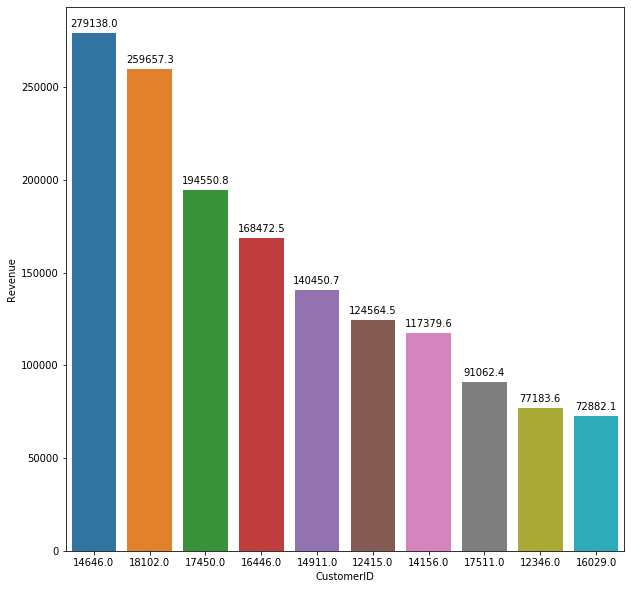

In [35]:
plt.figure(figsize=(10,10))
rev = sns.barplot(x='CustomerID',y='Revenue',data=rv,order=rv.sort_values('Revenue',ascending=False).CustomerID)

for p in rev.patches:
    rev.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These are the top 10 revenue-generating customers out of 4334 and the customers 14646 and 18102 being the highest among all.

2. The revenue ranges from 276K to 72K for the top ten customers. 


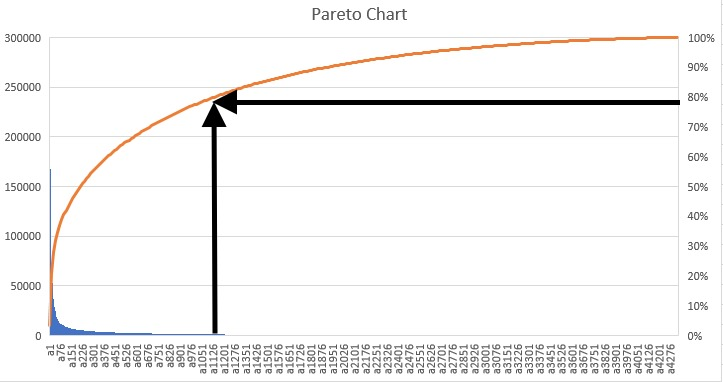

Inference:

1. From the above Pareto chart, we can see that 80% of Revenue is generated by 1125 customers out of the 4334 customers.
2. Hence, we can conclude that 25% of customers contribute to the 80% of the Revenue generated, which follows the Pareto principle.

## Calculating the Variety of products purchased by each Customer

In [36]:
# New Attribute : Frequency

products = data.groupby('CustomerID')['InvoiceNo'].nunique()
products= products.reset_index()
products.columns = ['CustomerID', 'Tot_Trans']
products

,CustomerID,Tot_Trans
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,16


In [37]:
tot_t = products.sort_values('Tot_Trans',ascending=False)
tot_t.head(10)

,CustomerID,Tot_Trans
326,12748.0,206
1879,14911.0,199
4007,17841.0,124
562,13089.0,97
2176,15311.0,91
1661,14606.0,90
481,12971.0,86
1689,14646.0,72
795,13408.0,62
2700,16029.0,62


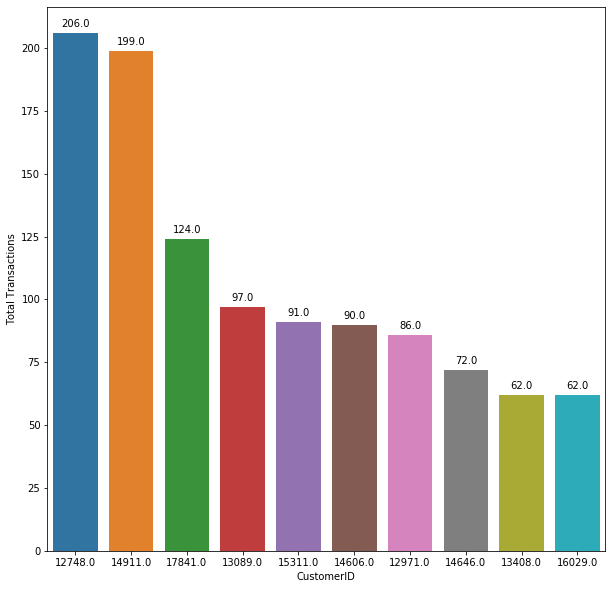

In [38]:
plt.figure(figsize=(10,10))
tt = sns.barplot(x='CustomerID', y='Tot_Trans', data=tot_t.head(10),order=tot_t.head(10).sort_values('Tot_Trans',ascending=False).CustomerID)
plt.ylabel('Total Transactions')

for p in tt.patches:
    tt.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. These top 10 customers are repeat purchasers.  The range is from 206 to 62K.
2. We may say a decent number of buyers may belong to a cluster of repeat buyers.
3. The sum of the number of transactions made by the purchaser in the whole year gives us an idea as to how regular the customer is.


In [39]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4334 entries, 0 to 4333
Data columns (total 2 columns):
CustomerID    4334 non-null float64
Tot_Trans     4334 non-null int64
dtypes: float64(1), int64(1)
memory usage: 67.8 KB


## Calculating the frequency of purchase per year

In [40]:
data['Invoice_Month'] = data['InvoiceDate'].dt.strftime('%B')
data['Invoice_Year'] = data['InvoiceDate'].dt.year

In [41]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Revenue,Invoice_Month,Invoice_Year
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01,2.55,17850.0,United Kingdom,15.30,December,2010
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01,2.75,17850.0,United Kingdom,22.00,December,2010
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01,3.39,17850.0,United Kingdom,20.34,December,2010
...,...,...,...,...,...,...,...,...,...,...,...
532614,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09,0.85,12680.0,France,10.20,December,2011
532615,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09,2.10,12680.0,France,12.60,December,2011
532616,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09,4.15,12680.0,France,16.60,December,2011
532617,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09,4.15,12680.0,France,16.60,December,2011


## Calculating the frequency of purchase per month in a particular year

In [42]:
# Monthly Frequency - For the year 2010

monthly_frequency = data[data['Invoice_Year']==2010].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
monthly_frequency

,Month,Frequency
0,December,26065


In [43]:
# Monthly Frequency - For the year 2011

monthly_frequency = data[data['Invoice_Year']==2011].groupby('Invoice_Month')['InvoiceNo'].count()
monthly_frequency = monthly_frequency.reset_index()
monthly_frequency.columns = ['Month', 'Frequency']
mf = monthly_frequency.sort_values(by = 'Frequency',ascending = False)
mf

,Month,Frequency
9,November,64323
10,October,49381
11,September,39888
8,May,28216
6,June,27090
7,March,27069
1,August,26907
5,July,26730
0,April,22563
4,January,21141


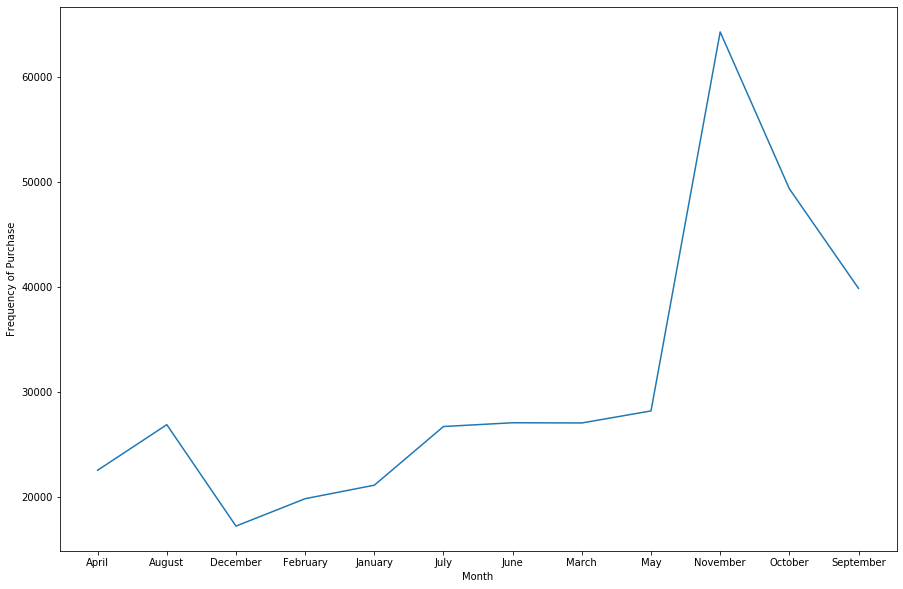

In [44]:
plt.figure(figsize=(15,10))
sns.lineplot(x='Month', y='Frequency',data=mf)
plt.ylabel('Frequency of Purchase')
plt.show()

Inference:

1. We can see that the number of products purchased is high in the month of November. With Thanksgiving and Christmas around the corner, the sales of gift items skyrocket’s in this month.
2. The shopkeepers purchase in bulk to keep their stocks ready for the two festivals and have some leftover for the subsequent months, hence we see a sharp dip right after November.


In [45]:
# We observe that November has the highest amount of transactions. The shop is a custom gift shop and thus has a very high amount of buyers during the christmas season.
# The months after the peak see a dramatic fall in purchases. Most purchasers are dealers of gift items that already have their stocks full and loaded and this runs out slowly. 


## Total Quantity of purchase per customer

In [46]:
tot_quantity = data['Quantity'].groupby(data['CustomerID']).sum().reset_index()
tot_quantity.sort_values(by = 'Quantity')

,CustomerID,Quantity
4094,17956.0,1
824,13452.0,2
3012,16454.0,2
3483,17102.0,2
2871,16257.0,2
...,...,...
0,12346.0,74215
55,12415.0,77373
1879,14911.0,80263
3006,16446.0,80997


Inference: We observe that as many as 3713 customers purchase goods of more than 100 units of quantity which shows that at least 80 percent of the customers can be considered to be wholesalers.

In [47]:
tot_q = tot_quantity.sort_values(by = 'Quantity',ascending=False)
tot_q

,CustomerID,Quantity
1689,14646.0,196844
3006,16446.0,80997
1879,14911.0,80263
55,12415.0,77373
0,12346.0,74215
...,...,...
824,13452.0,2
2321,15510.0,2
3012,16454.0,2
3483,17102.0,2


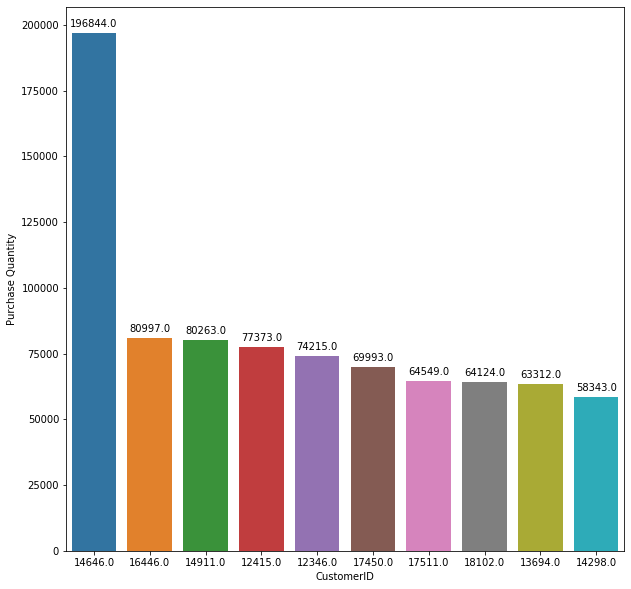

In [48]:
plt.figure(figsize=(10,10))
quan = sns.barplot(x = 'CustomerID',y='Quantity',data=tot_q.head(10),order=tot_q.head(10).sort_values('Quantity',ascending=False).CustomerID)
plt.ylabel('Purchase Quantity')

for p in quan.patches:
    quan.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. Customer number 14646 has the highest amount of quantity purchased of 196K. The customer is a wholesale buyer.

2. The Top 10 ranges from 196K to 58K, who will be classified as wholesale buyers. With good discounts, these buyers can be retained as well as expect an increase in buying quantity.


In [49]:
data['Description'][data['CustomerID']==14646]

37348          PACK OF 12 WOODLAND TISSUES 
37349      PACK OF 12 PINK POLKADOT TISSUES
37350     SET OF 3 CAKE TINS PANTRY DESIGN 
37351                JUMBO STORAGE BAG SUKI
37352           PACK OF 20 SPACEBOY NAPKINS
                        ...                
525744        PACK OF 20 NAPKINS RED APPLES
525745     PACK OF 20 NAPKINS PANTRY DESIGN
525746               SPACEBOY BIRTHDAY CARD
525747                     CARD DOLLY GIRL 
528536            JUMBO BAG 50'S CHRISTMAS 
Name: Description, Length: 2060, dtype: object

CustomerID = 14646 has the highest purchase in terms of quantity purchased. 

# Repeat Buyers

Although many purchases of bulk quatities were made in the year, what is of more importance to any retail unit is the ability to retain its customers.
We therefore calculate the number of days in a year the customer has bought a product. 

In [50]:

uniquedates = data.groupby('CustomerID')['InvoiceDate'].nunique()
uniquedates= uniquedates.reset_index()

uniquedates.columns = ['CustomerID', 'Retention']
uniquedates

,CustomerID,Retention
0,12346.0,1
1,12347.0,7
2,12348.0,4
3,12349.0,1
4,12350.0,1
...,...,...
4329,18280.0,1
4330,18281.0,1
4331,18282.0,2
4332,18283.0,14


In [51]:
uniquedates['Retention'].max()

131

In [52]:
ret = uniquedates.sort_values('Retention',ascending=False)
ret.head(10)

,CustomerID,Retention
1879,14911.0,131
326,12748.0,113
4007,17841.0,112
2176,15311.0,90
1661,14606.0,88
481,12971.0,71
562,13089.0,66
1602,14527.0,54
1069,13798.0,53
2988,16422.0,48


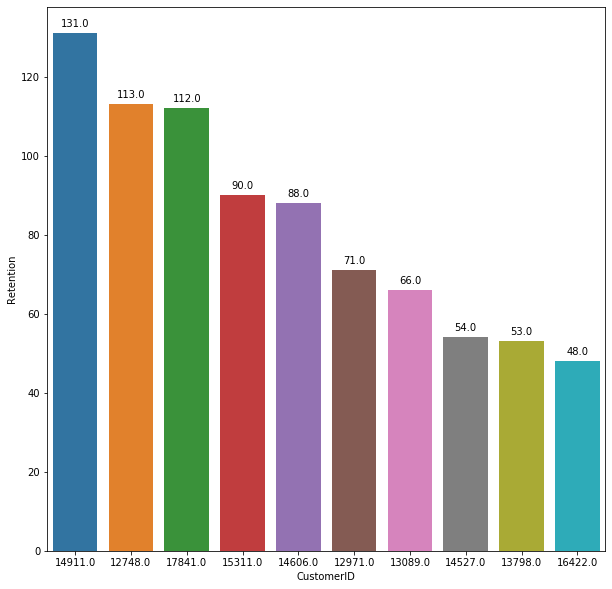

In [53]:
plt.figure(figsize=(10,10))
ret = sns.barplot(x='CustomerID', y='Retention', data=ret.head(10),order=ret.head(10).sort_values('Retention',ascending=False).CustomerID)


for p in ret.patches:
    ret.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

1. Repeat purchase is important for every retail outlet. The retention factor here gives us an insight as to how many days in the year a customer has made a purchase. 
2. A high retention value of 131 shows that on 131 days in a year the customer made a purchase, which is almost once in 3 days. This enables us to predict his next purchase accurately and have stock ready.


# Unique Products Purchased

We then calculate the total number of different products a customer purchases in a year from the shop.

In [54]:
prod_var = data.groupby('CustomerID')['StockCode'].nunique()
prod_var= prod_var.reset_index()
prod_var.columns = ['CustomerID', 'uniqueproducts']
prod_var

,CustomerID,uniqueproducts
0,12346.0,1
1,12347.0,103
2,12348.0,21
3,12349.0,72
4,12350.0,16
...,...,...
4329,18280.0,10
4330,18281.0,7
4331,18282.0,12
4332,18283.0,262


In [55]:
unq_pr = prod_var.sort_values('uniqueproducts',ascending=False)
unq_pr.head(10)

,CustomerID,uniqueproducts
1879,14911.0,1786
326,12748.0,1766
4007,17841.0,1322
1289,14096.0,1118
1434,14298.0,884
1661,14606.0,816
1779,14769.0,717
1333,14156.0,714
1689,14646.0,699
562,13089.0,636


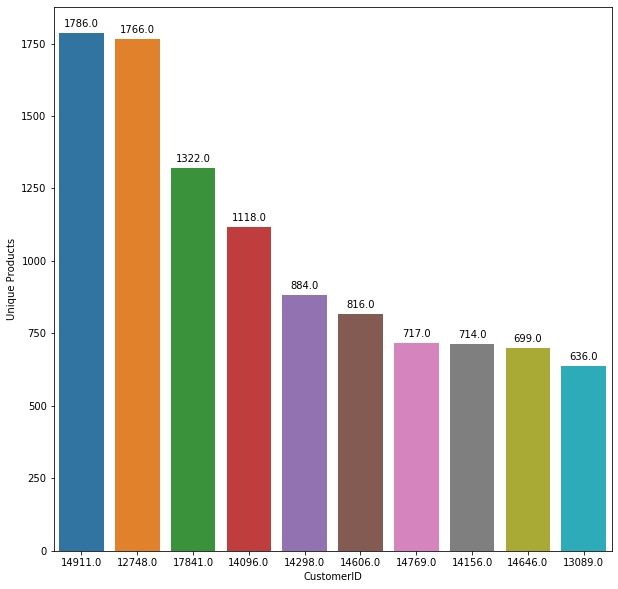

In [56]:
plt.figure(figsize=(10,10))
unip = sns.barplot(x='CustomerID', y='uniqueproducts', data=unq_pr.head(10),order=unq_pr.head(10).sort_values('uniqueproducts',ascending=False).CustomerID)
plt.ylabel('Unique Products')

for p in unip.patches:
    unip.annotate(format(p.get_height(), '.1f'), 
                   (p.get_x() + p.get_width() / 2., p.get_height()), 
                   ha = 'center', va = 'center', 
                   xytext = (0, 9), 
                   textcoords = 'offset points')

Inference:

The shop sells a wide variety of products. Since most of the customers are retailers, it gives us a valuable insight to know how many of the products in the shop each retailer purchases.

In [57]:
loc = data['Country'].groupby(data['CustomerID'])
loc

In [58]:

cdata= pd.merge(revenue,products, on='CustomerID', how='inner')
cdata.columns = ['CustomerID', 'Revenue', 'Tot_Trans']
cdata.head()
cdata2= pd.merge(tot_quantity,uniquedates, on='CustomerID', how='inner')
cdata2.head()
cdata3 = pd.merge(prod_var,cdata2,on='CustomerID')
#cdata4 = pd.merge(cdata3,loc,on = 'CustomerID')

csdata = pd.merge(cdata,cdata3,on = 'CustomerID',how = 'inner')
csdata

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


In [59]:
csdata.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
count,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000,4334.000000
mean,15299.251731,2023.016302,4.247116,61.433549,1190.007153,3.848408
std,1721.994109,8924.198162,7.643124,85.312905,5043.301380,5.931010
min,12346.000000,3.750000,1.000000,1.000000,1.000000,1.000000
25%,13812.250000,305.867500,1.000000,16.000000,160.000000,1.000000
50%,15297.500000,668.125000,2.000000,35.000000,379.000000,2.000000
75%,16778.750000,1631.622500,5.000000,77.000000,991.750000,4.000000
max,18287.000000,279138.020000,206.000000,1786.000000,196844.000000,131.000000


In [60]:
correl_cs = csdata.corr()
correl_cs

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
CustomerID,1.000000,-0.009908,-0.008539,-0.006737,-0.020985,-0.009999
Revenue,-0.009908,1.000000,0.550672,0.381083,0.923565,0.491057
Tot_Trans,-0.008539,0.550672,1.000000,0.691574,0.557049,0.969709
uniqueproducts,-0.006737,0.381083,0.691574,1.000000,0.410017,0.685692
Quantity,-0.020985,0.923565,0.557049,0.410017,1.000000,0.505253
Retention,-0.009999,0.491057,0.969709,0.685692,0.505253,1.000000


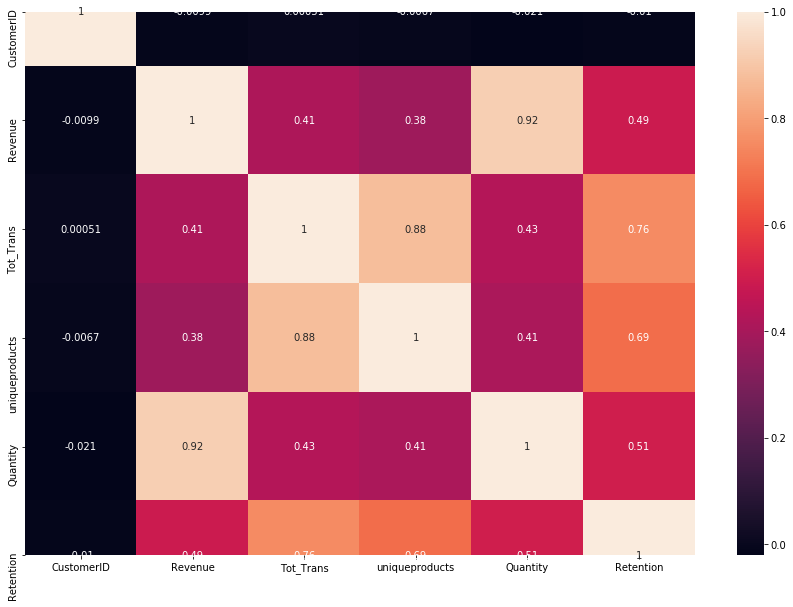

In [70]:
plt.figure(figsize=(15,10))
sns.heatmap(correl_cs,annot = True)

Inference:

1. As we can see from the above correlation plot, Customer Retention is strongly correlated with the Total transactions and Unique products purchased.
2. The more unique products and the customer purchases the sooner he comes back to the shop.


In [61]:
fdata = csdata

In [62]:
csdata

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2
4332,18283.0,2088.93,16,262,1395,14


In [63]:
csdata1 = csdata.drop('CustomerID',axis = 1)
csdata1

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,77183.60,1,1,74215,1
1,4310.00,7,103,2458,7
2,1437.24,4,21,2332,4
3,1457.55,1,72,630,1
4,294.40,1,16,196,1
...,...,...,...,...,...
4329,180.60,1,10,45,1
4330,80.82,1,7,54,1
4331,178.05,2,12,103,2
4332,2088.93,16,262,1395,14


# Scaling the data before modelling

In [64]:
from sklearn.preprocessing import StandardScaler

In [65]:
sc =StandardScaler()
csdatasc = sc.fit_transform(csdata1)
csc = pd.DataFrame(csdatasc)
csc.columns = csdata1.columns

In [66]:
csc

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687
4332,0.007387,1.537884,2.351222,0.040651,1.711810


# Clustering

## Iteration 1

#### K-Means

In [67]:
from sklearn.cluster import KMeans


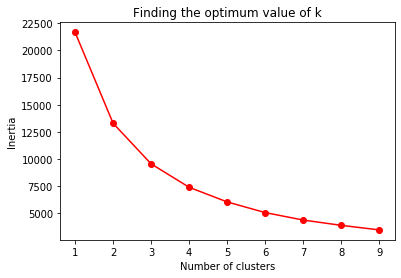

In [68]:
wcss = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(csc)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

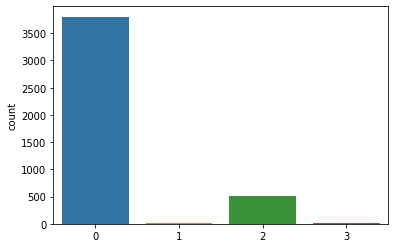

In [69]:
mod = KMeans(n_clusters=4,n_init=12,random_state=22)
mod.fit(csc)
lab=list(mod.labels_)
sns.countplot(lab)

In [70]:
wcss

[21669.99999999996,
 13287.287395838575,
 9545.389846712189,
 7389.709544984476,
 6039.781898379312,
 5057.528929078376,
 4370.81601538044,
 3883.3388683789985,
 3463.787650395876]

In [71]:

mod = KMeans(n_clusters=3,n_init=12,random_state=22)
mod.fit(csc)


KMeans(n_clusters=3, n_init=12, random_state=22)

In [72]:
mod.labels_

array([1, 0, 0, ..., 0, 2, 0])

In [73]:
mod.cluster_centers_

array([[-0.12544238, -0.21340089, -0.22445994, -0.12725202, -0.230524  ],
       [11.68638918,  8.73472529,  6.37348235, 11.90915898,  7.79167151],
       [ 0.51863214,  1.27261697,  1.43710899,  0.5242166 ,  1.4322999 ]])

In [74]:
centroids=mod.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(csc))
columns = list(csc)
centroid_df.columns=csc.columns
centroid_df

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,-0.125442,-0.213401,-0.224460,-0.127252,-0.230524
1,11.686389,8.734725,6.373482,11.909159,7.791672
2,0.518632,1.272617,1.437109,0.524217,1.432300


In [75]:
mod.inertia_

9545.389846712189

In [76]:
from sklearn import metrics
metrics.silhouette_score(csc,mod.labels_)

0.6880902638254195

In [77]:
csc_k = csc.copy()

In [78]:
csc_k['labels'] = mod.labels_

In [79]:
csc_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,1
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0
4332,0.007387,1.537884,2.351222,0.040651,1.711810,2


In [80]:
csc_k['labels'].value_counts()

0    3803
2     513
1      18
Name: labels, dtype: int64

#### AGC

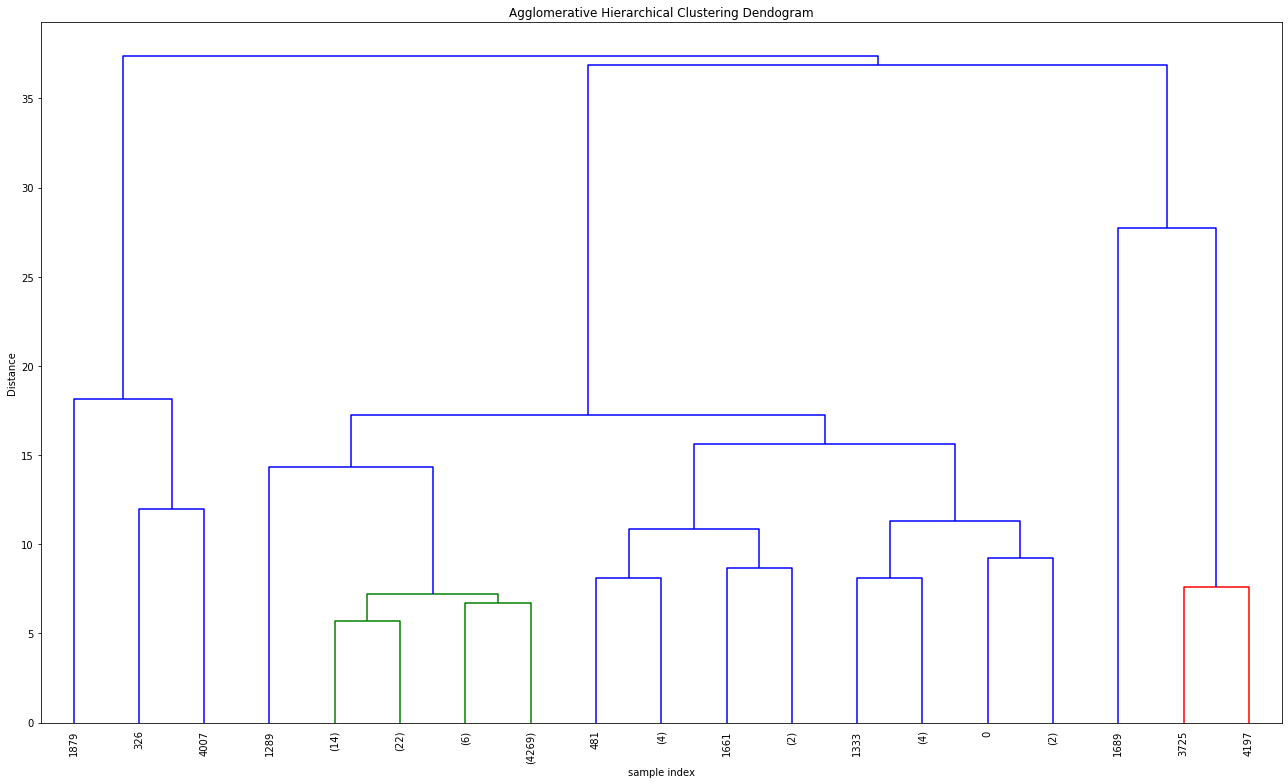

In [81]:
# Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

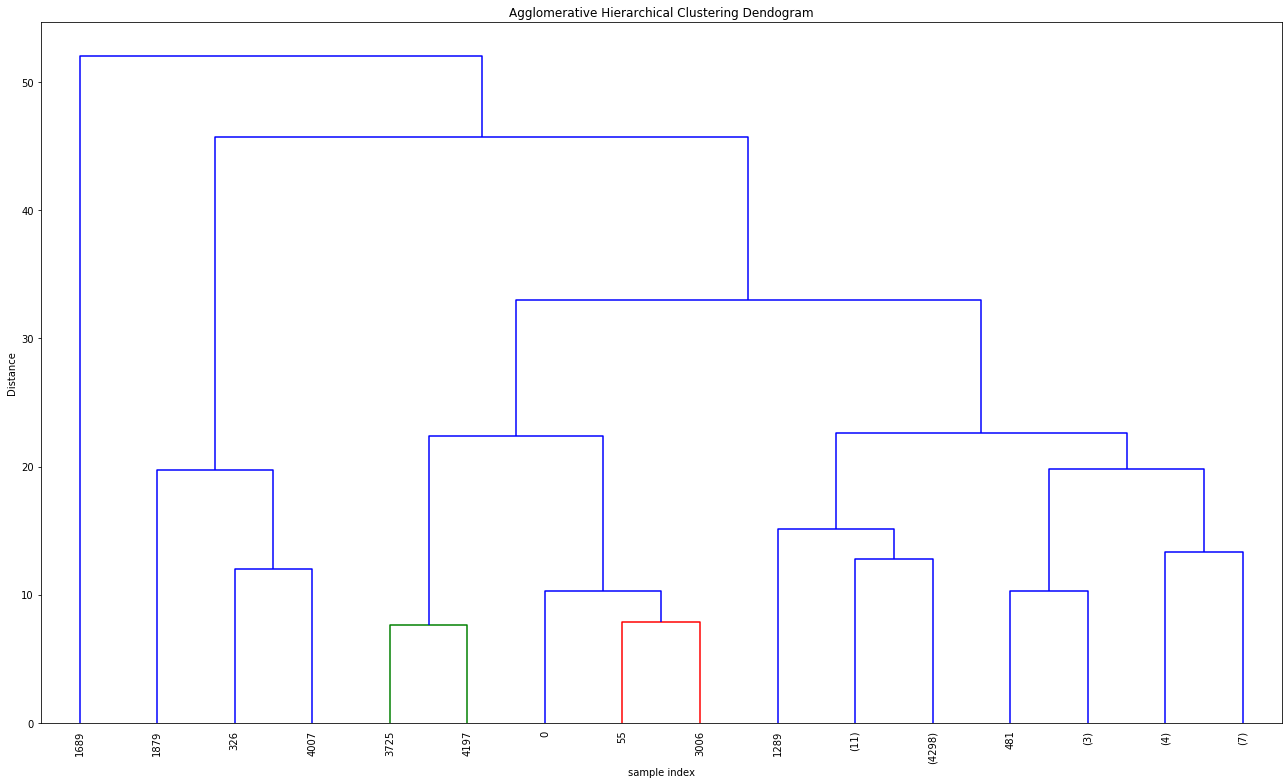

In [82]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

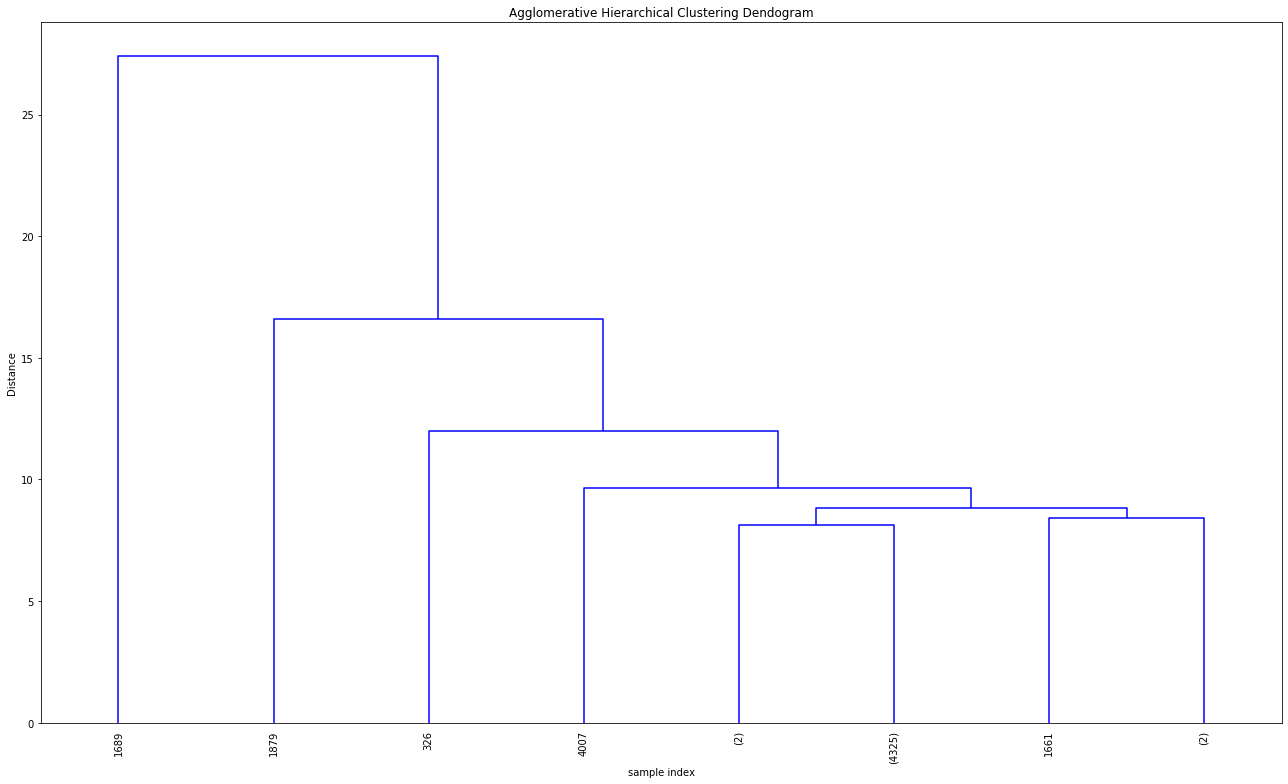

In [83]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

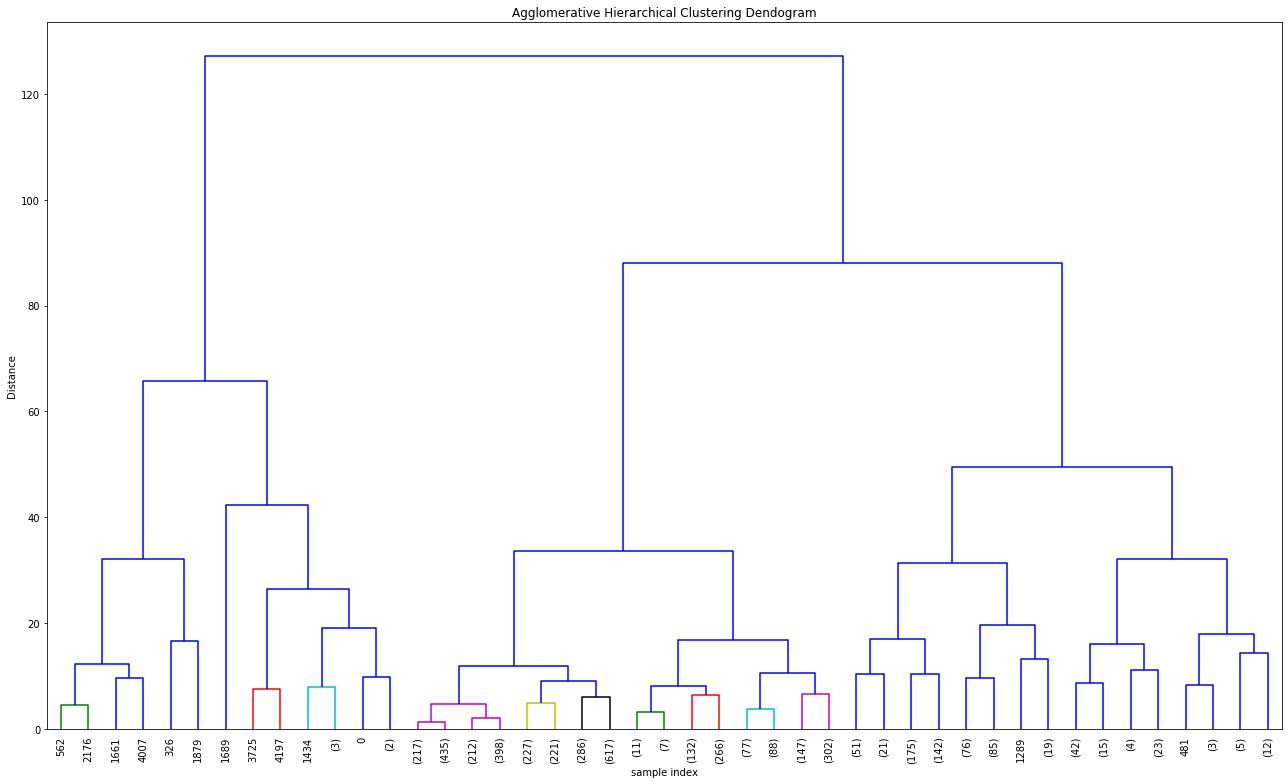

In [84]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(csc, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

Inference: 

1. Ward Linkage shows the best split of clusters and sub-clusters.
2. Hence, we build our model with the 'Ward' Linkage.

In [85]:
from sklearn.cluster import AgglomerativeClustering 
modagc = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='ward')
modagc.fit(csc)

AgglomerativeClustering(n_clusters=3)

In [86]:
modagc.labels_

array([0, 1, 2, ..., 2, 1, 2], dtype=int64)

In [87]:
L=pd.DataFrame(modagc.labels_)
L[0].value_counts()

2    3643
1     675
0      16
Name: 0, dtype: int64

In [88]:
csc_a = csc.copy()

In [89]:
csc_a['labels']=modagc.labels_

In [90]:
csc_a

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,0
1,0.256297,0.360219,0.487280,0.251450,0.531437,1
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,2
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,2
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,2
...,...,...,...,...,...,...
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,2
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,2
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,2
4332,0.007387,1.537884,2.351222,0.040651,1.711810,1


In [91]:
csc_a['labels'].value_counts()

2    3643
1     675
0      16
Name: labels, dtype: int64

In [92]:
agc_clusters = csc_a.copy()

In [93]:
agc_clusters_group = agc_clusters.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)

In [94]:
df0.shape

(16, 6)

In [95]:
df1.shape

(675, 6)

In [96]:
df2.shape

(3643, 6)

In [97]:
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())

In [98]:
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]

In [99]:
agc_I0 = 0
agc_I1 = 0
agc_I2 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)  

In [100]:
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2)

Inertia of AGC: 9706.373615324464


In [101]:
metrics.silhouette_score(csc,modagc.labels_)

0.6565591394293558

Iteration 1

Observations: 

Class1 : 3788
Class2 : 530
Class3 : 16

Inertia:
1. K-Means - 9777.225554893133
2. AGC - 9990.237551295166

Silhouette Score:
1. K-Means - 0.6906517832443647
2. AGC - 0.6681213016473552

Inference: K-Means is a better model than AGC.But the cluster sizes vary a lot. This brings about the need to search for subclusters.

In [102]:
csdata1 = csdata.copy()

In [103]:
csdata1['labels'] = mod.labels_

In [104]:
csdata1['labels'].value_counts()

0    3803
2     513
1      18
Name: labels, dtype: int64

In [105]:
csdata_high = csdata1[csdata1['labels']==2]
csdata_high

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
12,12359.0,6372.58,4,214,1622,4,2
15,12362.0,4737.23,10,200,2197,10,2
39,12395.0,2682.63,12,90,2097,11,2
56,12417.0,3226.10,9,157,1527,9,2
66,12428.0,6405.26,8,256,3509,7,2
...,...,...,...,...,...,...,...
4289,18225.0,5509.12,12,150,3244,12,2
4290,18226.0,5228.05,11,141,3466,11,2
4293,18229.0,7276.90,20,66,2488,20,2
4303,18241.0,2073.09,17,60,1051,17,2


In [106]:
csdata_sub = csdata1[csdata1['labels']!=2]
csdata_sub.drop('labels',axis=1,inplace=True)

C:\Users\DELL\Anaconda3\lib\site-packages\pandas\core\frame.py:4102: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


In [107]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4328,18278.0,173.90,1,9,66,1
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2


## Sub-Clustering 

In [108]:
#We take only clusters 0 and 1 to form sub clusters and explore further sub clustering possibilities.

#### AGC

In [109]:
subd1 = csc_k[csc_k.labels != 2]
subd1

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,1
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [110]:
subd11 = subd1.drop('labels',axis=1)
subd11

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687


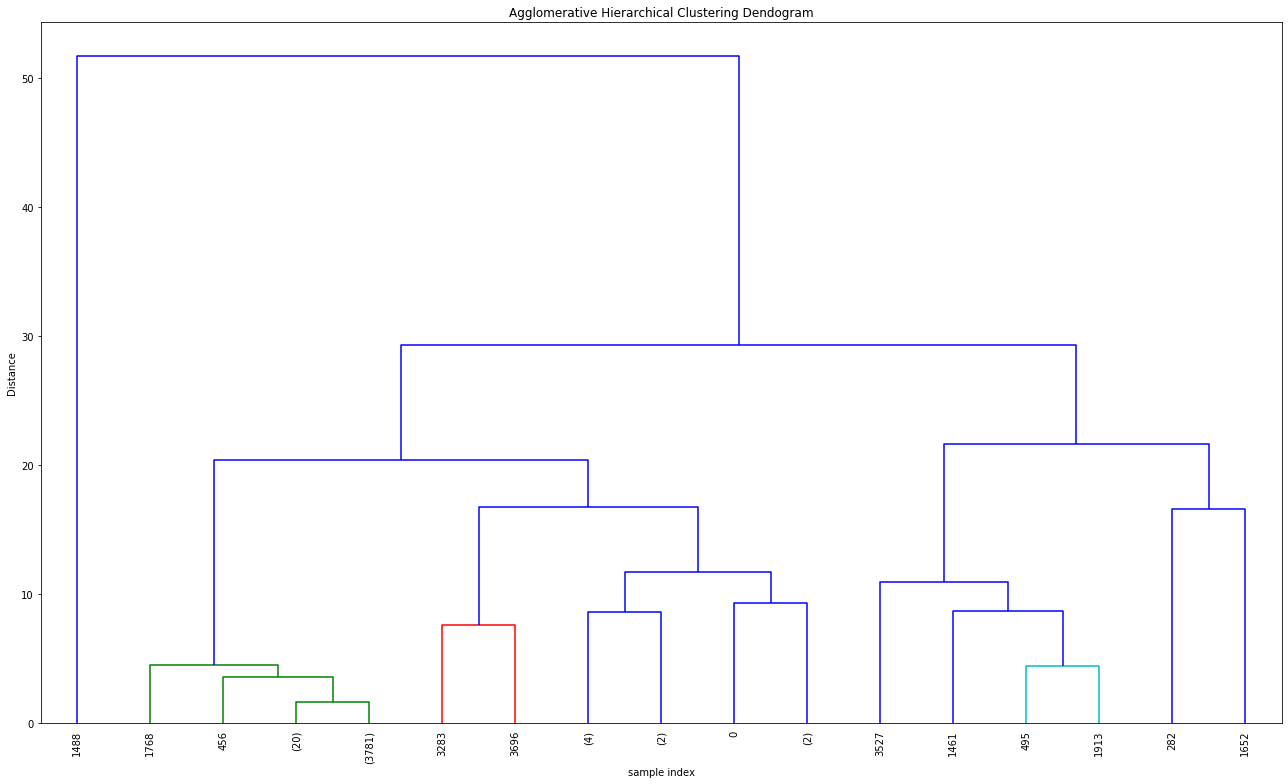

In [111]:
# Average Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'average')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

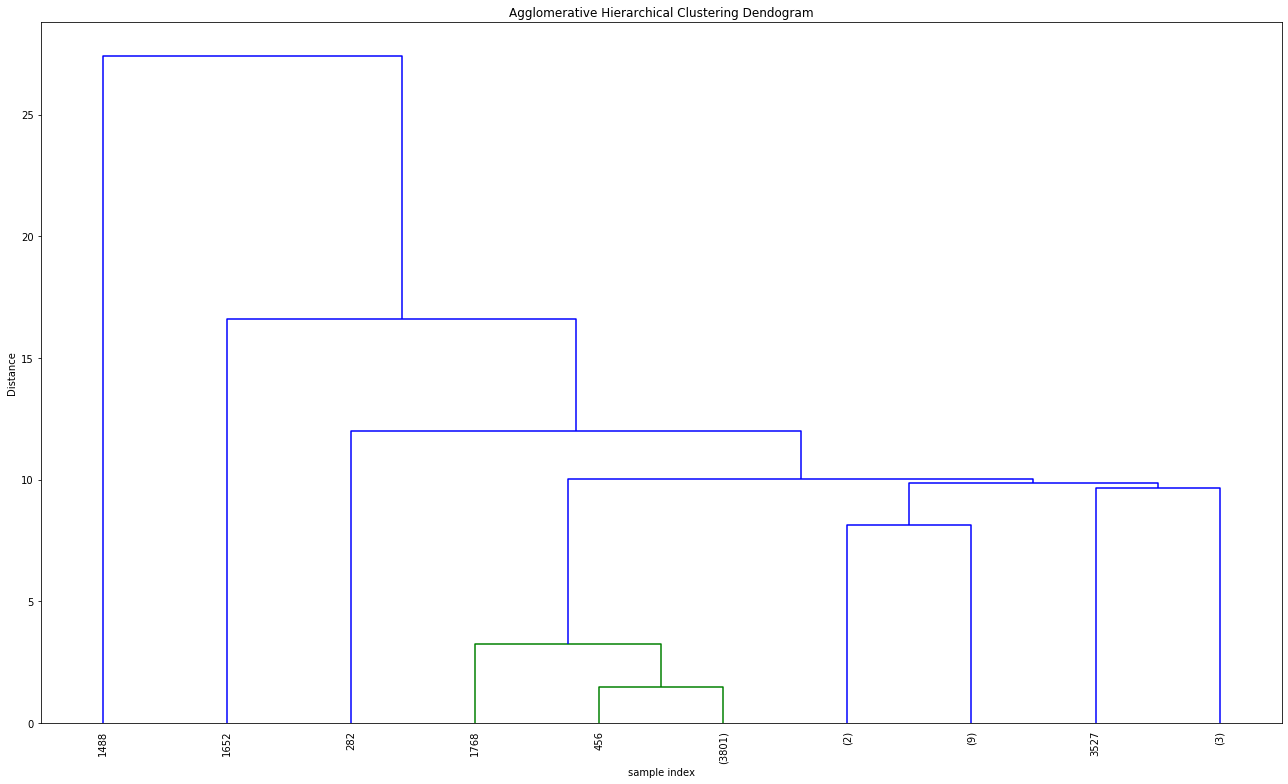

In [112]:
# Min Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'single')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

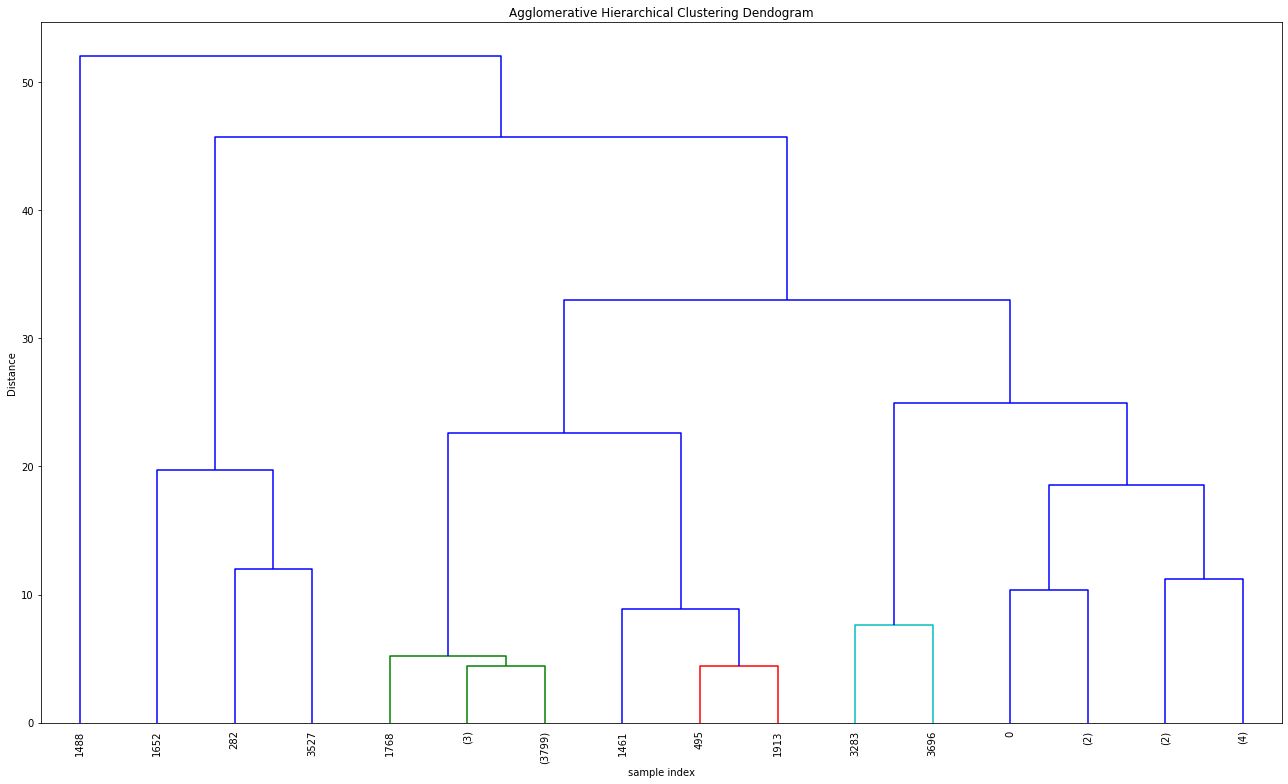

In [113]:
# Max Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'complete')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

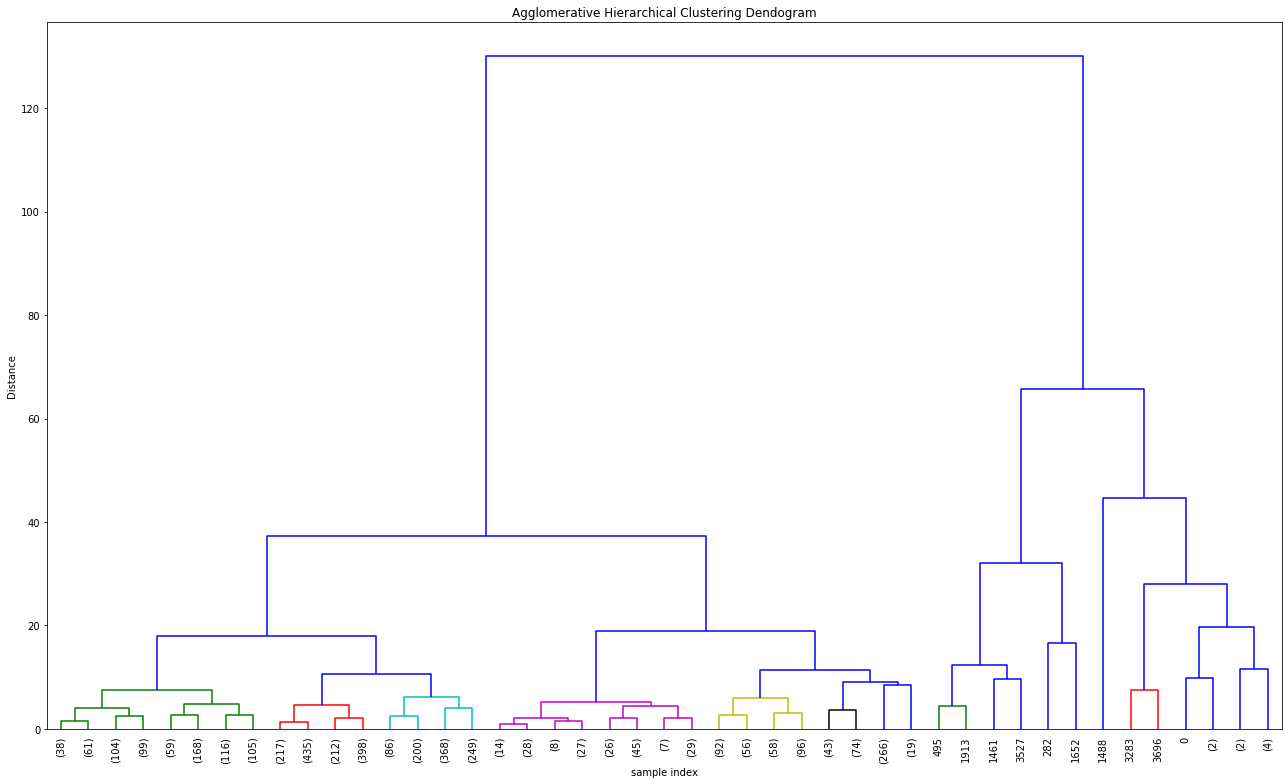

In [114]:
# Ward Linkage
from scipy.cluster.hierarchy import dendrogram, linkage
plt.figure(figsize=(18, 11))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
Z = linkage(subd11, 'ward')
dendrogram(Z,leaf_rotation=90.0,leaf_font_size=10,truncate_mode='level',p=5,color_threshold=8)
plt.tight_layout()

Inference: 

1. Ward Linkage shows the best split of clusters and sub-clusters.
2. Hence, we build our model with the 'Ward' Linkage.

In [115]:
modsub1 = AgglomerativeClustering(n_clusters=4, affinity='euclidean',  linkage='ward')
modsub1.fit(subd11)

AgglomerativeClustering(n_clusters=4)

In [116]:
M=pd.DataFrame(modsub1.labels_)
M[0].value_counts()

0    3803
1      11
2       6
3       1
Name: 0, dtype: int64

In [117]:
subd11

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687


In [118]:
subd11_agc = subd11.copy()

In [119]:
subd11_agc['labels'] = modsub1.labels_

In [120]:
subd11_agc

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,1
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [121]:
subd11_agc['labels'].value_counts()

0    3803
1      11
2       6
3       1
Name: labels, dtype: int64

In [122]:
agc_clusters2 = subd11_agc.copy()

In [123]:
agc_clusters_group = agc_clusters2.groupby(['labels'])
df0 = agc_clusters_group.get_group(0)
df1 = agc_clusters_group.get_group(1)
df2 = agc_clusters_group.get_group(2)
df3 = agc_clusters_group.get_group(3)

In [124]:
df0.shape

(3803, 6)

In [125]:
df1.shape

(11, 6)

In [126]:
df2.shape

(6, 6)

In [127]:
df3.shape

(1, 6)

In [128]:
c0 = np.array(df0.mean())
c1 = np.array(df1.mean())
c2 = np.array(df2.mean())
c3 = np.array(df3.mean())

In [129]:
c0 = c0[:-1]
c1 = c1[:-1]
c2 = c2[:-1]
c3 = c3[:-1]

In [130]:
agc_I0 = 0
agc_I1 = 0
agc_I2 = 0
agc_I3 = 0

for i in np.arange(df0.shape[0]):
    agc_I0 = agc_I0+np.sum((df0.iloc[i,:-1]-c0)**2)
for i in np.arange(df1.shape[0]):
    agc_I1 = agc_I1+np.sum((df1.iloc[i,:-1]-c1)**2)
for i in np.arange(df2.shape[0]):
    agc_I2 = agc_I2+np.sum((df2.iloc[i,:-1]-c2)**2)
for i in np.arange(df3.shape[0]):
    agc_I3 = agc_I3+np.sum((df3.iloc[i,:-1]-c3)**2)    

In [131]:
print("Inertia of AGC:",agc_I0+agc_I1+agc_I2+agc_I3)

Inertia of AGC: 3181.976205464423


In [132]:
silhoutte_a2 = silhouette_score(subd11, subd11_agc['labels'])
silhoutte_a2

0.960827247199179

#### K-Means

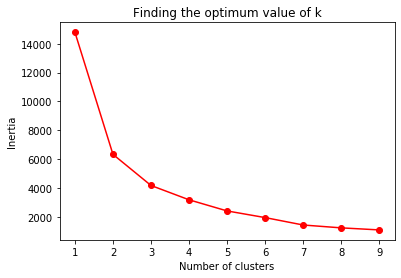

In [133]:
wcss = []

for k in range (1,10):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit(subd11)
    wcss.append(kmeans.inertia_)
    
# Visualization of k values:

plt.plot(range(1,10), wcss, color='red',marker = 'o')
plt.title('Finding the optimum value of k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [134]:
wcss

[14792.709675502541,
 6330.5957570739865,
 4174.905381659204,
 3181.976205464429,
 2410.4065226170906,
 1949.709382979758,
 1435.5447151047372,
 1237.5872461837737,
 1095.6128893604405]

In [135]:
skmod1 = KMeans(n_clusters=4,n_init=12,random_state=22)
skmod1.fit(subd11)


KMeans(n_clusters=4, n_init=12, random_state=22)

In [136]:
skmod1.cluster_centers_

array([[-0.12543625, -0.21338768, -0.22382582, -0.12723926, -0.230501  ],
       [ 6.22346275, 17.04380531, 12.74748824,  6.51648898, 16.21354399],
       [12.90532326,  4.19060422,  2.79669269, 12.40605696,  3.27542217],
       [31.05567291,  8.86557695,  7.47413321, 38.79930109,  6.93917941]])

In [137]:
centroids=skmod1.cluster_centers_
centroid_df = pd.DataFrame(centroids,columns = list(subd11))
columns = list(subd11)
centroid_df.columns=subd11.columns 
centroid_df

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,-0.125436,-0.213388,-0.223826,-0.127239,-0.230501
1,6.223463,17.043805,12.747488,6.516489,16.213544
2,12.905323,4.190604,2.796693,12.406057,3.275422
3,31.055673,8.865577,7.474133,38.799301,6.939179


In [138]:
skmod1.labels_

array([2, 0, 0, ..., 0, 0, 0])

In [139]:
subd11_k = subd11.copy()

In [140]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312
1,0.256297,0.360219,0.487280,0.251450,0.531437
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312
...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687


In [141]:
subd11_k['labels'] = skmod1.labels_

In [142]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,2
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [143]:
subd11_k['labels'].value_counts()

0    3803
2      11
1       6
3       1
Name: labels, dtype: int64

In [144]:
subd11_k[subd11_k.labels==0]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
5,-0.071418,0.360219,-0.051974,-0.131676,0.531437,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [145]:
subd11_k[subd11_k.labels==1]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
326,3.395016,26.399699,19.982477,4.822991,18.405667,1
562,6.365767,12.136868,6.735590,5.925373,10.480300,1
1661,1.118844,11.220907,8.845714,0.996286,14.190046,1
1879,15.513290,25.483737,20.216935,15.680625,21.440913,1
2176,6.583411,11.351758,5.926709,7.338103,14.527296,1
4007,4.364448,15.669863,14.777505,4.335556,18.237042,1


In [146]:
subd11_k[subd11_k.labels==2]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,2
55,13.732960,2.061291,4.473069,15.107521,1.880435,2
996,7.062133,5.986841,3.570405,12.319145,5.252931,2
1333,12.927764,6.641099,7.649977,11.242940,6.601930,2
1434,5.547837,5.201731,9.642871,11.333764,3.566683,2
2700,7.941022,7.557060,-0.216095,7.737292,5.758806,2
3006,18.653630,-0.294039,-0.685011,15.826181,-0.311687,2
3174,7.243004,3.108104,0.674846,9.729868,2.049060,2
3725,21.576167,5.463434,0.733461,13.644025,3.903933,2
3768,9.978447,3.500659,4.590298,12.564449,4.072558,2


In [147]:
subd11_k[subd11_k.labels==3]

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1689,31.055673,8.865577,7.474133,38.799301,6.939179,3


In [148]:
from sklearn.metrics import silhouette_score


In [149]:
skmod1.inertia_

3181.976205464429

In [150]:
silhoutte_k2 = silhouette_score(subd11, subd11_k['labels'])
silhoutte_k2

0.960827247199179

Sub Clustering - 2

Observations: 

4 clusters are formed

class 1 : 973
class 2 : 3132
class 3 : 189
class 4 : 24

Inertia:
1. K-Means - 2743.6720677749086
2. AGC - 3066.4775542287525

Silhouette Score:
1. K-Means - 0.5675597883996122
2. AGC - 0.5475331152944759

Inference: K-Means is a better model than AGC.4 subclusters are formed.

In [151]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention
0,12346.0,77183.60,1,1,74215,1
1,12347.0,4310.00,7,103,2458,7
2,12348.0,1437.24,4,21,2332,4
3,12349.0,1457.55,1,72,630,1
4,12350.0,294.40,1,16,196,1
...,...,...,...,...,...,...
4328,18278.0,173.90,1,9,66,1
4329,18280.0,180.60,1,10,45,1
4330,18281.0,80.82,1,7,54,1
4331,18282.0,178.05,2,12,103,2


In [152]:
subd11_k

,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,8.423082,-0.424890,-0.708457,14.481272,-0.480312,2
1,0.256297,0.360219,0.487280,0.251450,0.531437,0
2,-0.065647,-0.032336,-0.473999,0.226464,0.025562,0
3,-0.063371,-0.424890,0.123870,-0.111053,-0.480312,0
4,-0.193722,-0.424890,-0.532613,-0.197117,-0.480312,0
...,...,...,...,...,...,...
4328,-0.207226,-0.424890,-0.614674,-0.222897,-0.480312,0
4329,-0.206476,-0.424890,-0.602951,-0.227061,-0.480312,0
4330,-0.217658,-0.424890,-0.638120,-0.225277,-0.480312,0
4331,-0.206761,-0.294039,-0.579505,-0.215560,-0.311687,0


In [153]:
csdata_sub['labels'] = skmod1.labels_

C:\Users\DELL\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [154]:
csdata_sub

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,2
1,12347.0,4310.00,7,103,2458,7,0
2,12348.0,1437.24,4,21,2332,4,0
3,12349.0,1457.55,1,72,630,1,0
4,12350.0,294.40,1,16,196,1,0
...,...,...,...,...,...,...,...
4328,18278.0,173.90,1,9,66,1,0
4329,18280.0,180.60,1,10,45,1,0
4330,18281.0,80.82,1,7,54,1,0
4331,18282.0,178.05,2,12,103,2,0


In [155]:
csdata_high

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
12,12359.0,6372.58,4,214,1622,4,2
15,12362.0,4737.23,10,200,2197,10,2
39,12395.0,2682.63,12,90,2097,11,2
56,12417.0,3226.10,9,157,1527,9,2
66,12428.0,6405.26,8,256,3509,7,2
...,...,...,...,...,...,...,...
4289,18225.0,5509.12,12,150,3244,12,2
4290,18226.0,5228.05,11,141,3466,11,2
4293,18229.0,7276.90,20,66,2488,20,2
4303,18241.0,2073.09,17,60,1051,17,2


In [156]:
csdata_highf = csdata_high.replace({'labels':{2:4}})

In [157]:
csdata_highf

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
12,12359.0,6372.58,4,214,1622,4,4
15,12362.0,4737.23,10,200,2197,10,4
39,12395.0,2682.63,12,90,2097,11,4
56,12417.0,3226.10,9,157,1527,9,4
66,12428.0,6405.26,8,256,3509,7,4
...,...,...,...,...,...,...,...
4289,18225.0,5509.12,12,150,3244,12,4
4290,18226.0,5228.05,11,141,3466,11,4
4293,18229.0,7276.90,20,66,2488,20,4
4303,18241.0,2073.09,17,60,1051,17,4


# Final Customer Details

In [158]:
csdata_final = pd.concat([csdata_highf,csdata_sub])

In [159]:
csdata_final

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
12,12359.0,6372.58,4,214,1622,4,4
15,12362.0,4737.23,10,200,2197,10,4
39,12395.0,2682.63,12,90,2097,11,4
56,12417.0,3226.10,9,157,1527,9,4
66,12428.0,6405.26,8,256,3509,7,4
...,...,...,...,...,...,...,...
4328,18278.0,173.90,1,9,66,1,0
4329,18280.0,180.60,1,10,45,1,0
4330,18281.0,80.82,1,7,54,1,0
4331,18282.0,178.05,2,12,103,2,0


## Class 0 Customers : Customers with low frequency of purchase and low revenue.

In [160]:
a1 = csdata_final[csdata_final['labels']==0]
print(a1)

      CustomerID  Revenue  Tot_Trans  uniqueproducts  Quantity  Retention  \
1        12347.0  4310.00          7             103      2458          7   
2        12348.0  1437.24          4              21      2332          4   
3        12349.0  1457.55          1              72       630          1   
4        12350.0   294.40          1              16       196          1   
5        12352.0  1385.74          7              57       526          7   
...          ...      ...        ...             ...       ...        ...   
4328     18278.0   173.90          1               9        66          1   
4329     18280.0   180.60          1              10        45          1   
4330     18281.0    80.82          1               7        54          1   
4331     18282.0   178.05          2              12       103          2   
4333     18287.0  1837.28          3              59      1586          3   

      labels  
1          0  
2          0  
3          0  
4          0  


In [161]:
a1.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.000000,3803.0
mean,15298.674468,903.727537,2.616356,42.340521,548.375230,2.481462,0.0
std,1722.467950,1198.482406,1.970673,38.762974,754.673529,1.815927,0.0
min,12347.000000,3.750000,1.000000,1.000000,1.000000,1.000000,0.0
25%,13802.500000,272.330000,1.000000,14.000000,143.000000,1.000000,0.0
50%,15307.000000,554.650000,2.000000,30.000000,310.000000,2.000000,0.0
75%,16777.500000,1140.640000,4.000000,59.000000,693.000000,3.000000,0.0
max,18287.000000,39916.500000,12.000000,259.000000,17280.000000,12.000000,0.0


In [162]:
csdata_f0 = csdata_final[csdata_final['labels']==0]

In [163]:
csdata_f0['Retention'].mean()

2.481462003681304

## Class 1 Customers - Least Revenue Generating And Least Frequent Customers

In [168]:
a2 = csdata_final[csdata_final['labels']==1]

In [169]:
a2.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,14751.00000,57556.023333,134.500000,1148.833333,34050.833333,100.000000,1.0
std,1826.61315,44430.549537,54.150716,553.022393,25021.534433,23.125743,0.0
min,12748.00000,12006.650000,90.000000,567.000000,6214.000000,66.000000,1.0
25%,13468.25000,34479.920000,92.500000,681.000000,23667.500000,88.500000,1.0
50%,14758.50000,49896.775000,110.500000,1069.000000,28290.500000,101.000000,1.0
75%,15211.00000,60282.382500,180.250000,1655.000000,36413.000000,112.750000,1.0
max,17841.00000,140450.720000,206.000000,1786.000000,80263.000000,131.000000,1.0


In [173]:
csdata_f1 = csdata_final[csdata_final['labels']==1]
csdata_f1.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,6.00000,6.000000,6.000000,6.000000,6.000000,6.000000,6.0
mean,14751.00000,57556.023333,134.500000,1148.833333,34050.833333,100.000000,1.0
std,1826.61315,44430.549537,54.150716,553.022393,25021.534433,23.125743,0.0
min,12748.00000,12006.650000,90.000000,567.000000,6214.000000,66.000000,1.0
25%,13468.25000,34479.920000,92.500000,681.000000,23667.500000,88.500000,1.0
50%,14758.50000,49896.775000,110.500000,1069.000000,28290.500000,101.000000,1.0
75%,15211.00000,60282.382500,180.250000,1655.000000,36413.000000,112.750000,1.0
max,17841.00000,140450.720000,206.000000,1786.000000,80263.000000,131.000000,1.0


In [174]:
csdata_f1['Retention'].mean()

100.0

## Class 2 Customers : Customers with moderate frequency of purchase and moderate revenue generated.


In [176]:
csdata_f2 = csdata_final[csdata_final['labels']==2]
csdata_f2

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
0,12346.0,77183.60,1,1,74215,1,2
55,12415.0,124564.53,20,443,77373,15,2
996,13694.0,65039.62,50,366,63312,35,2
1333,14156.0,117379.63,55,714,57885,43,2
1434,14298.0,51527.30,44,884,58343,25,2
2700,16029.0,72882.09,62,43,40207,38,2
3006,16446.0,168472.50,2,3,80997,2,2
3174,16684.0,66653.56,28,119,50255,16,2
3725,17450.0,194550.79,46,124,69993,27,2
3768,17511.0,91062.38,31,453,64549,28,2


In [182]:
csdata_f2.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,11.000000,11.000000,11.000000,11.000000,11.000000,11.000000,11.0
mean,15375.545455,117179.390909,36.272727,300.000000,63750.272727,23.272727,2.0
std,2073.667686,65419.779997,21.675290,298.422854,11968.827345,13.638848,0.0
min,12346.000000,51527.300000,1.000000,1.000000,40207.000000,1.000000,2.0
25%,13925.000000,69767.825000,24.000000,81.000000,58114.000000,15.500000,2.0
50%,16029.000000,91062.380000,44.000000,150.000000,64124.000000,26.000000,2.0
75%,17067.000000,146518.515000,52.500000,448.000000,72104.000000,31.500000,2.0
max,18102.000000,259657.300000,62.000000,884.000000,80997.000000,43.000000,2.0


In [183]:
csdata_f2['Retention'].mean()

23.272727272727273

## Class 3 Customers : Customers with fairly high frequency of purchase and fairly high revenue generated.

In [184]:
csdata_final[csdata_final['labels']==3]

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
1689,14646.0,279138.02,72,699,196844,45,3


In [185]:
csdata_f3 = csdata_final[csdata_final['labels']==3]
csdata_f3.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,1.0,1.00,1.0,1.0,1.0,1.0,1.0
mean,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0
std,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0
25%,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0
50%,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0
75%,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0
max,14646.0,279138.02,72.0,699.0,196844.0,45.0,3.0


In [186]:
csdata_f3['Retention'].mean()

45.0

## Class 4 Customers - High Revenue Generation Customers

In [187]:
csdata_final[csdata_final['labels']==4]

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
12,12359.0,6372.58,4,214,1622,4,4
15,12362.0,4737.23,10,200,2197,10,4
39,12395.0,2682.63,12,90,2097,11,4
56,12417.0,3226.10,9,157,1527,9,4
66,12428.0,6405.26,8,256,3509,7,4
...,...,...,...,...,...,...,...
4289,18225.0,5509.12,12,150,3244,12,4
4290,18226.0,5228.05,11,141,3466,11,4
4293,18229.0,7276.90,20,66,2488,20,4
4303,18241.0,2073.09,17,60,1051,17,4


In [188]:
csdata_f4 = csdata_final[csdata_final['labels']==4]
csdata_f4.describe()

,CustomerID,Revenue,Tot_Trans,uniqueproducts,Quantity,Retention,labels
count,513.000000,513.000000,513.000000,513.000000,513.000000,513.000000,513.0
mean,15309.580897,6661.655692,13.994152,183.898635,3839.411306,12.360624,4.0
std,1715.232696,7653.019311,9.108609,110.015897,4529.281666,7.623756,0.0
min,12359.000000,721.630000,2.000000,5.000000,283.000000,2.000000,4.0
25%,13983.000000,2788.870000,8.000000,105.000000,1663.000000,8.000000,4.0
50%,15251.000000,4413.100000,11.000000,168.000000,2589.000000,11.000000,4.0
75%,16782.000000,6924.110000,17.000000,236.000000,4245.000000,15.000000,4.0
max,18283.000000,58030.480000,86.000000,1118.000000,33704.000000,71.000000,4.0


In [189]:
csdata_f4['Retention'].mean()

12.360623781676413

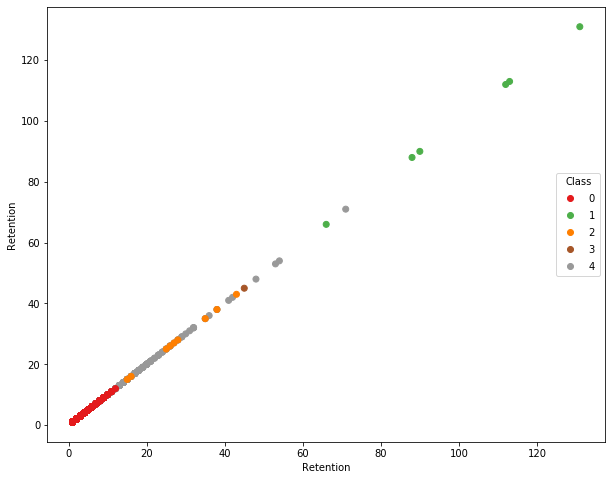

In [190]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Retention'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Retention')
plt.ylabel('Retention')
plt.legend(*scatter1.legend_elements(),
                    loc="center right", title="Class")
plt.show()

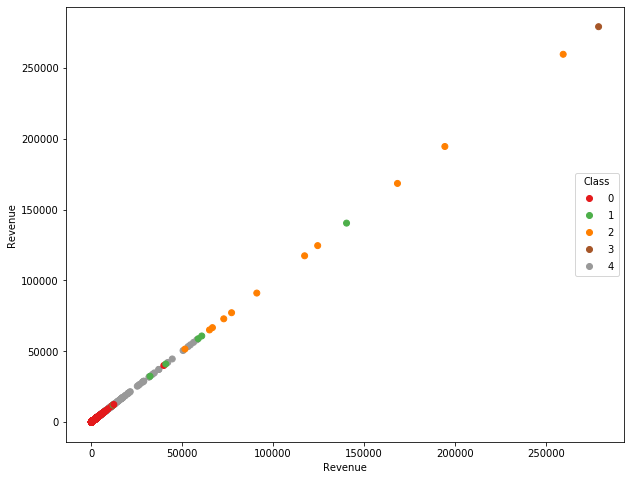

In [191]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Revenue'],csdata_final['Revenue'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Revenue')
plt.legend(*scatter1.legend_elements(),
                    loc="center right", title="Class")
plt.show()

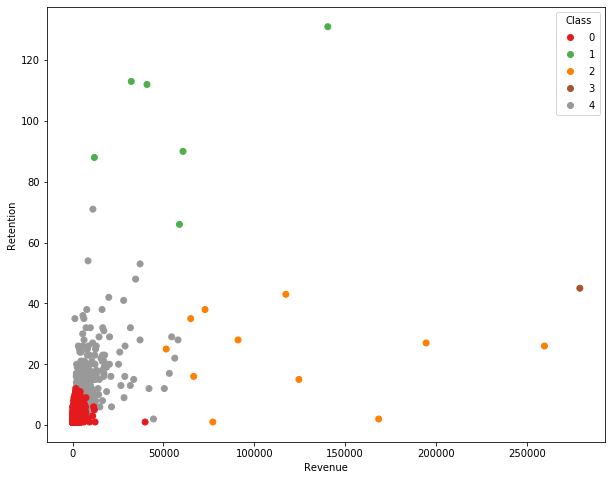

In [192]:
plt.figure(figsize=(10,8))
scatter1 = plt.scatter(csdata_final['Revenue'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Retention')
plt.legend(*scatter1.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

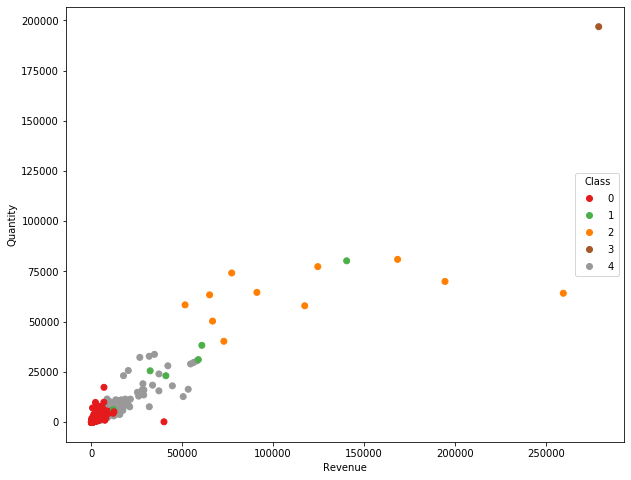

In [193]:
plt.figure(figsize=(10,8))
scatter2 = plt.scatter(csdata_final['Revenue'],csdata_final['Quantity'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('Revenue')
plt.ylabel('Quantity')
plt.legend(*scatter2.legend_elements(),
                    loc="center right", title="Class")
plt.show()

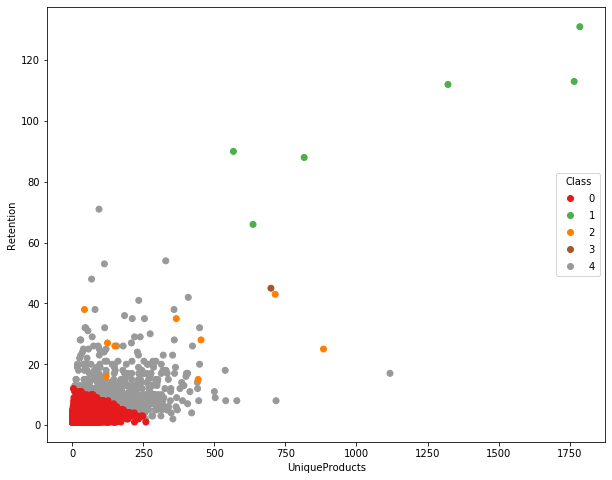

In [194]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(csdata_final['uniqueproducts'],csdata_final['Retention'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('UniqueProducts')
plt.ylabel('Retention')
plt.legend(*scatter3.legend_elements(),
                    loc="center right", title="Class")
plt.show()

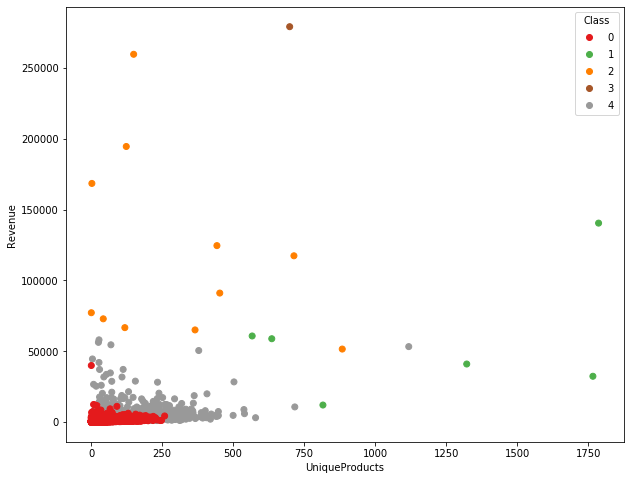

In [195]:
plt.figure(figsize=(10,8))
scatter3 = plt.scatter(csdata_final['uniqueproducts'],csdata_final['Revenue'], c=csdata_final.labels, cmap=plt.cm.Set1)
plt.xlabel('UniqueProducts')
plt.ylabel('Revenue')
plt.legend(*scatter3.legend_elements(),
                    loc="upper right", title="Class")
plt.show()

C:\Users\sathv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kde.py:487: RuntimeWarning: invalid value encountered in true_divide
  binned = fast_linbin(X, a, b, gridsize) / (delta * nobs)
C:\Users\sathv\Anaconda3\lib\site-packages\statsmodels\nonparametric\kdetools.py:34: RuntimeWarning: invalid value encountered in double_scalars
  FAC1 = 2*(np.pi*bw/RANGE)**2


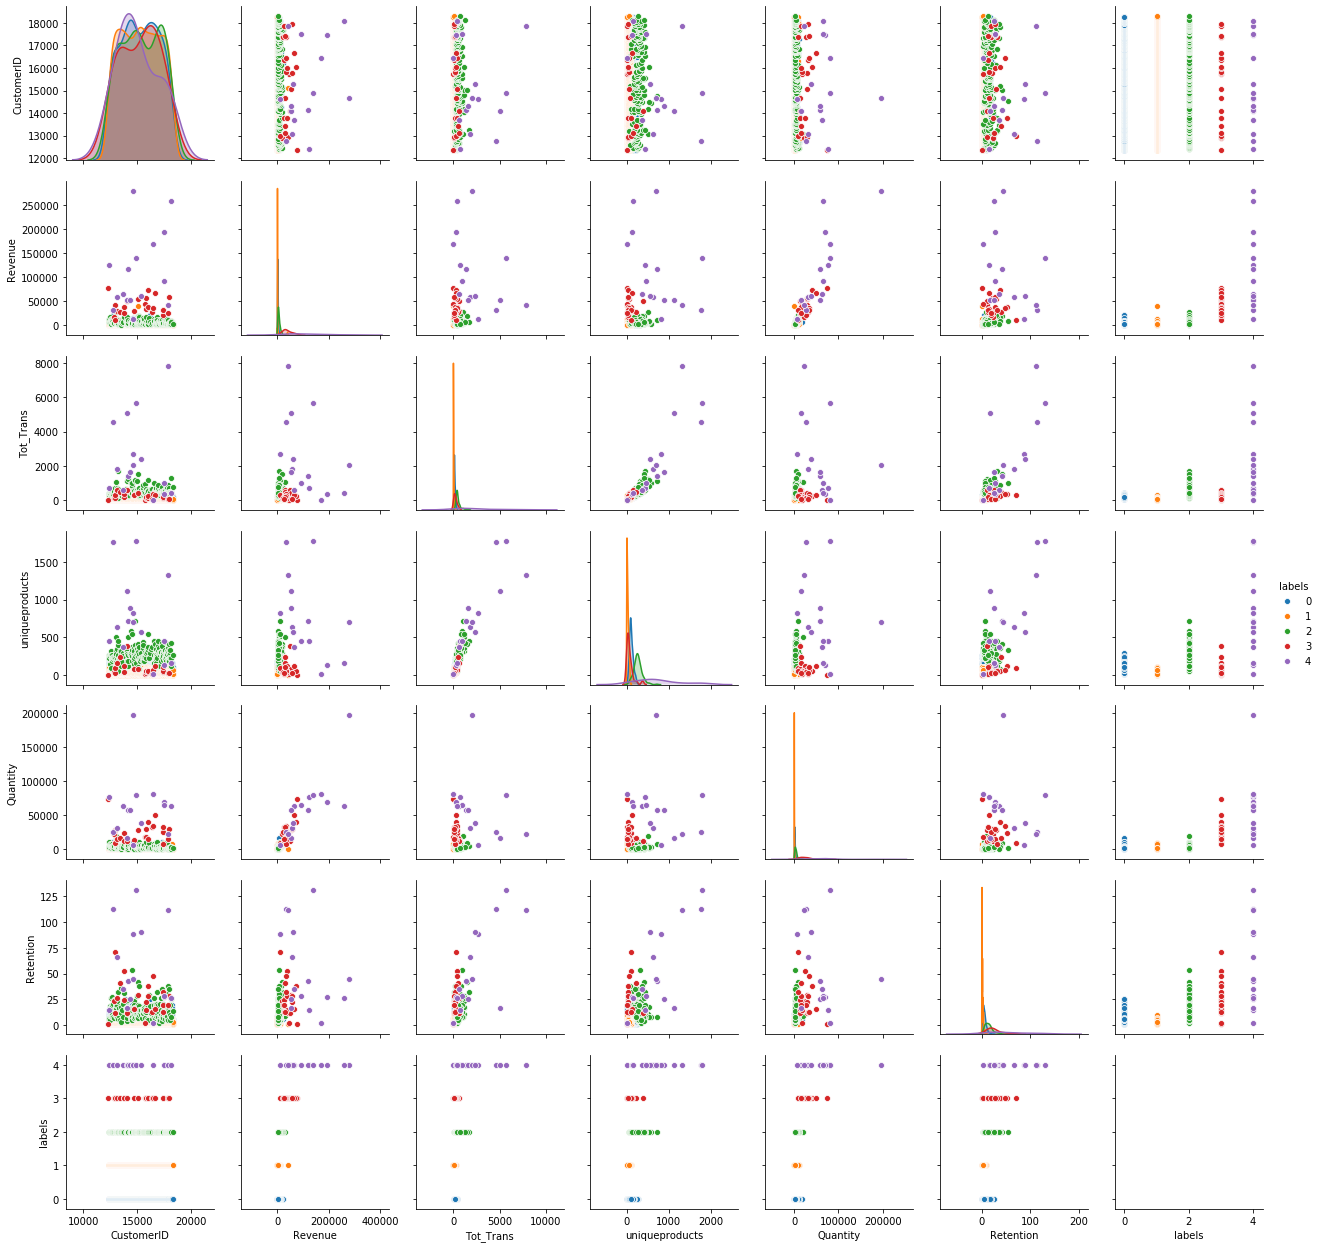

In [207]:
sns.pairplot(csdata_final,hue = 'labels')

In [198]:
from mpl_toolkits.mplot3d import Axes3D

Text(0.5, 0.92, '3D plot of KMeans Clustering')

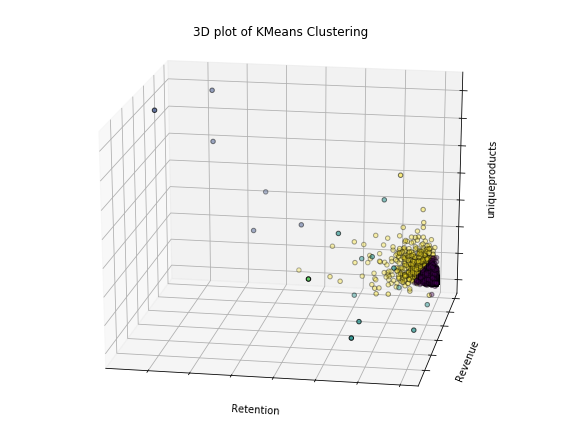

In [199]:
fig = plt.figure(figsize=(8, 6))
ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=20, azim=100)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'],c=csdata_final['labels']
           .astype(np.float), edgecolor='k')
ax.w_xaxis.set_ticklabels([])
ax.w_yaxis.set_ticklabels([])
ax.w_zaxis.set_ticklabels([])
ax.set_xlabel('Retention')
ax.set_ylabel('Revenue')
ax.set_zlabel('uniqueproducts')
ax.set_title('3D plot of KMeans Clustering')


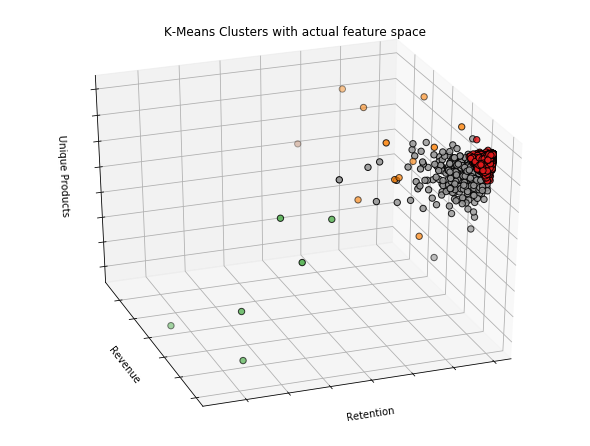

In [200]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=-150, azim=-250)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'], c=csdata_final['labels'],
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("K-Means Clusters with actual feature space")
ax.set_xlabel("Retention")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Revenue")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Unique Products")
ax.w_zaxis.set_ticklabels([])

plt.show()

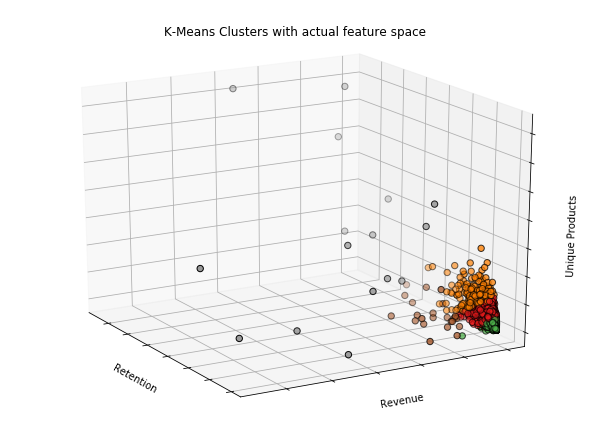

In [211]:
fig = plt.figure(1, figsize=(8, 6))
ax = Axes3D(fig, elev=20, azim=150)
ax.scatter(csdata_final['Retention'], csdata_final['Revenue'], csdata_final['uniqueproducts'], c=csdata_final['labels'],
           cmap=plt.cm.Set1, edgecolor='k',s=40)
ax.set_title("K-Means Clusters with actual feature space")
ax.set_xlabel("Retention")
ax.w_xaxis.set_ticklabels([])
ax.set_ylabel("Revenue")
ax.w_yaxis.set_ticklabels([])
ax.set_zlabel("Unique Products")
ax.w_zaxis.set_ticklabels([])

plt.show()

# Summary

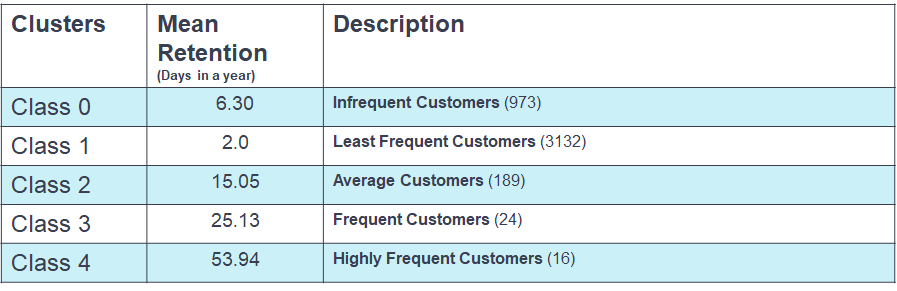

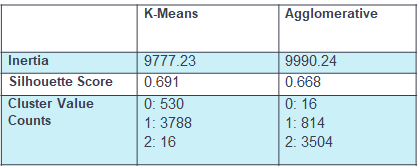

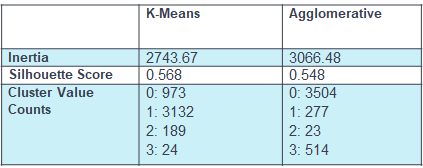